In [1]:
import pandas as pd 
import json
import matplotlib.pyplot as plt

In [2]:
path_to_iota_data = "../node-app/iota_data.csv"
path_to_node_data = "../node-app/node_data.csv"

df_iota = pd.read_csv(path_to_iota_data)
df_node = pd.read_csv(path_to_node_data)

In [3]:
df_iota['total_RTT'] = df_iota['timeToSync'] + df_iota['timeToReceiveMessage']
df_iota

,datetime,auth_node,sub_node,same_auth_sub,local_pow,timeToSync,timeToReceiveMessage,packet_size_bytes,total_RTT
0,1648232809052,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,280,1346,2,1626
1,1648232815537,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,103,6326,2,6429
2,1648232818560,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,121,2843,2,2964
3,1648232819169,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,114,442,2,556
4,1648232825017,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,122,5667,2,5789
...,...,...,...,...,...,...,...,...,...
787,1649894425972,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,334,40169,1024,40503
788,1649894451769,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,347,25285,1024,25632
789,1649894468264,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,331,15996,1024,16327
790,1649894479221,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,335,10457,1024,10792


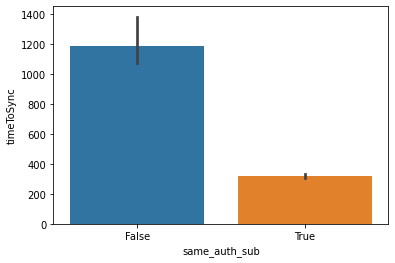

In [4]:
import seaborn as sns
# who v/s fare barplot
 
sns.barplot(x = 'same_auth_sub',
            y = 'timeToSync',
            data = df_iota)
 
# Show the plot
plt.show()

In [5]:
df_iota_very_small = df_iota[df_iota['packet_size_bytes'] < 100] 
df_iota_small = df_iota[df_iota['packet_size_bytes'] < 600] 
df_iota_small


,datetime,auth_node,sub_node,same_auth_sub,local_pow,timeToSync,timeToReceiveMessage,packet_size_bytes,total_RTT
0,1648232809052,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,280,1346,2,1626
1,1648232815537,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,103,6326,2,6429
2,1648232818560,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,121,2843,2,2964
3,1648232819169,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,114,442,2,556
4,1648232825017,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,122,5667,2,5789
...,...,...,...,...,...,...,...,...,...
778,1649894190821,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,334,10624,512,10958
779,1649894205262,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,330,13947,512,14277
780,1649894212445,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,329,6690,512,7019
781,1649894229250,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,334,16306,512,16640


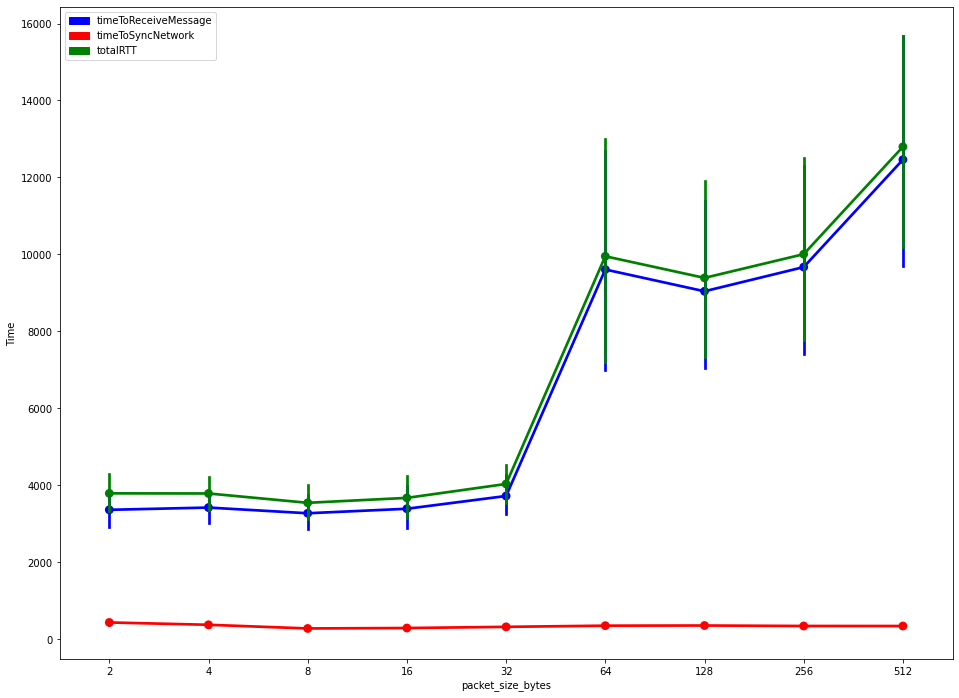

In [6]:
fig, ax = plt.subplots(figsize=(16,12))
# who v/s fare barplot



ax_1 = sns.pointplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_iota_small,
                    color = 'blue')

ax_2 = sns.pointplot(x = 'packet_size_bytes',
            y = 'timeToSync',
            data = df_iota_small,
           color = 'red')

ax_3 = sns.pointplot(x = 'packet_size_bytes',
            y = 'total_RTT',
            data = df_iota_small,
           color = 'green')

ax_3.set_ylabel("Time")

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='blue', label='timeToReceiveMessage')
blue_patch = mpatches.Patch(color='red', label='timeToSyncNetwork')
green_patch = mpatches.Patch(color='green', label='totalRTT')
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

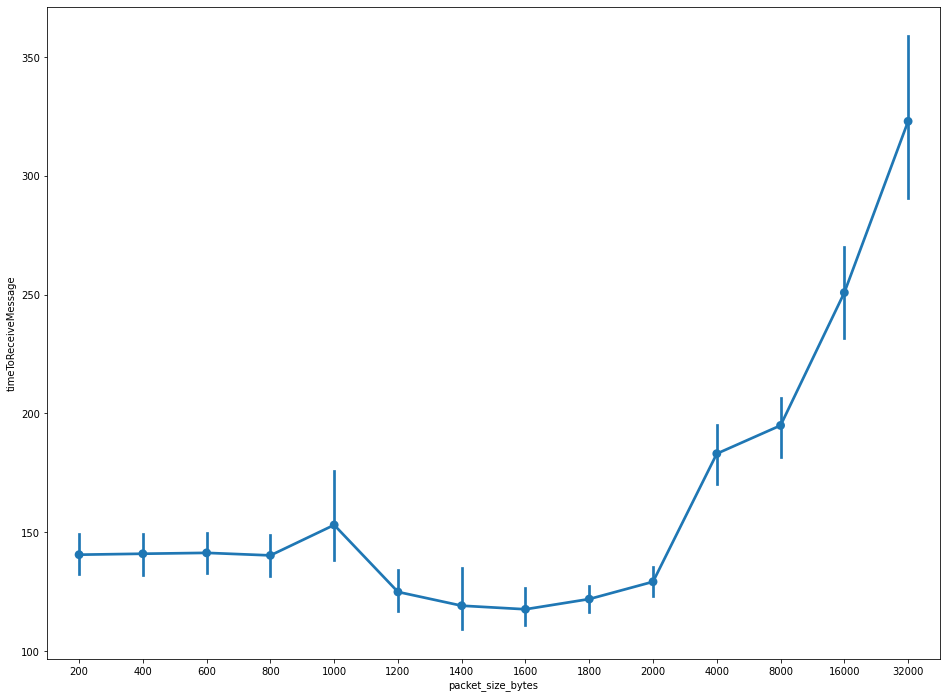

In [7]:
fig, ax = plt.subplots(figsize=(16,12))

ax1 = sns.pointplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_node)

In [8]:
df_node

,datetime,timeToReceiveMessage,packet_size_bytes
0,1648231818144,108,2000
1,1648231818209,86,2000
2,1648231818274,86,2000
3,1648231818331,79,2000
4,1648231818396,86,2000
...,...,...,...
584,1649895916650,419,32000
585,1649895918066,409,32000
586,1649895919498,426,32000
587,1649895920911,407,32000


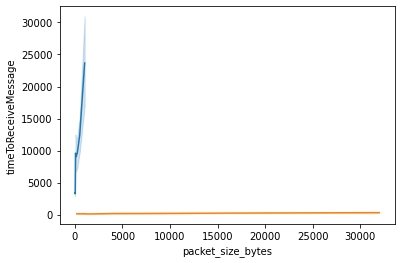

In [9]:
fig, ax = plt.subplots()

ax = sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_iota)

ax1 = sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_node)

In [10]:
df_node_grouped = df_node.groupby("packet_size_bytes").mean()

In [11]:
df_iota_grouped = df_iota.groupby("packet_size_bytes").mean()
df_iota_grouped = df_iota_grouped.drop(columns=['same_auth_sub', 'local_pow', 'datetime'])
df_iota_grouped

,timeToSync,timeToReceiveMessage,total_RTT
packet_size_bytes,,,
2,427.692857,3356.400000,3784.092857
4,366.708955,3414.671642,3781.380597
8,271.610000,3266.740000,3538.350000
16,282.788889,3383.888889,3666.677778
32,313.256637,3715.530973,4028.787611
64,343.920000,9604.660000,9948.580000
128,348.060000,9038.500000,9386.560000
256,335.760000,9667.460000,10003.220000
512,334.893617,12460.425532,12795.319149


In [12]:
path_to_network_data = "../node-app/iota_network_data.csv"
df_network = pd.read_csv(path_to_network_data)

In [13]:
df_network

,time,node,url,network_id,messages_per_second,is_healthy
0,1648451400,HORNET,http://54.177.214.21,chrysalis-mainnet,16.1,True
1,1648452000,HORNET,http://54.177.214.21,chrysalis-mainnet,16.1,True
2,1648452600,HORNET,http://54.177.214.21,chrysalis-mainnet,13.7,True
3,1648453200,HORNET,http://54.177.214.21,chrysalis-mainnet,19.5,True
4,1648453800,HORNET,http://54.177.214.21,chrysalis-mainnet,9.2,True
...,...,...,...,...,...,...
1992,1649647200,HORNET,http://54.177.214.21,chrysalis-mainnet,11.7,True
1993,1649647800,HORNET,http://54.177.214.21,chrysalis-mainnet,12.2,True
1994,1649648400,HORNET,http://54.177.214.21,chrysalis-mainnet,13.1,True
1995,1649649000,HORNET,http://54.177.214.21,chrysalis-mainnet,11.9,True


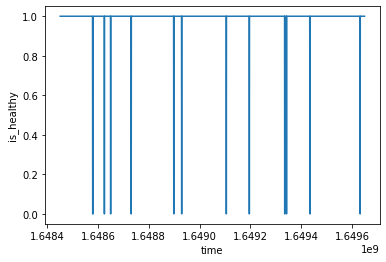

In [14]:
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.lineplot(x = 'time',
            y = 'is_healthy',
            data = df_network)

# ax1 = sns.lineplot(x = 'packet_size_bytes',
#             y = 'timeToReceiveMessage',
#             data = df_node)

In [15]:
import datetime

date_trans = []
for index, row in df_network.iterrows():
    date_trans.append(datetime.datetime.utcfromtimestamp(int(df_network['time'][index])))
    
print(date_trans)
df_network['date_trans'] = date_trans
df_network

[datetime.datetime(2022, 3, 28, 7, 10), datetime.datetime(2022, 3, 28, 7, 20), datetime.datetime(2022, 3, 28, 7, 30), datetime.datetime(2022, 3, 28, 7, 40), datetime.datetime(2022, 3, 28, 7, 50), datetime.datetime(2022, 3, 28, 8, 0), datetime.datetime(2022, 3, 28, 8, 10), datetime.datetime(2022, 3, 28, 8, 20), datetime.datetime(2022, 3, 28, 8, 30), datetime.datetime(2022, 3, 28, 8, 40), datetime.datetime(2022, 3, 28, 8, 50), datetime.datetime(2022, 3, 28, 9, 0), datetime.datetime(2022, 3, 28, 9, 10), datetime.datetime(2022, 3, 28, 9, 20), datetime.datetime(2022, 3, 28, 9, 30), datetime.datetime(2022, 3, 28, 9, 40), datetime.datetime(2022, 3, 28, 9, 50), datetime.datetime(2022, 3, 28, 10, 0), datetime.datetime(2022, 3, 28, 10, 10), datetime.datetime(2022, 3, 28, 10, 20), datetime.datetime(2022, 3, 28, 10, 30), datetime.datetime(2022, 3, 28, 10, 40), datetime.datetime(2022, 3, 28, 10, 50), datetime.datetime(2022, 3, 28, 11, 0), datetime.datetime(2022, 3, 28, 11, 10), datetime.datetime(20

,time,node,url,network_id,messages_per_second,is_healthy,date_trans
0,1648451400,HORNET,http://54.177.214.21,chrysalis-mainnet,16.1,True,2022-03-28 07:10:00
1,1648452000,HORNET,http://54.177.214.21,chrysalis-mainnet,16.1,True,2022-03-28 07:20:00
2,1648452600,HORNET,http://54.177.214.21,chrysalis-mainnet,13.7,True,2022-03-28 07:30:00
3,1648453200,HORNET,http://54.177.214.21,chrysalis-mainnet,19.5,True,2022-03-28 07:40:00
4,1648453800,HORNET,http://54.177.214.21,chrysalis-mainnet,9.2,True,2022-03-28 07:50:00
...,...,...,...,...,...,...,...
1992,1649647200,HORNET,http://54.177.214.21,chrysalis-mainnet,11.7,True,2022-04-11 03:20:00
1993,1649647800,HORNET,http://54.177.214.21,chrysalis-mainnet,12.2,True,2022-04-11 03:30:00
1994,1649648400,HORNET,http://54.177.214.21,chrysalis-mainnet,13.1,True,2022-04-11 03:40:00
1995,1649649000,HORNET,http://54.177.214.21,chrysalis-mainnet,11.9,True,2022-04-11 03:50:00


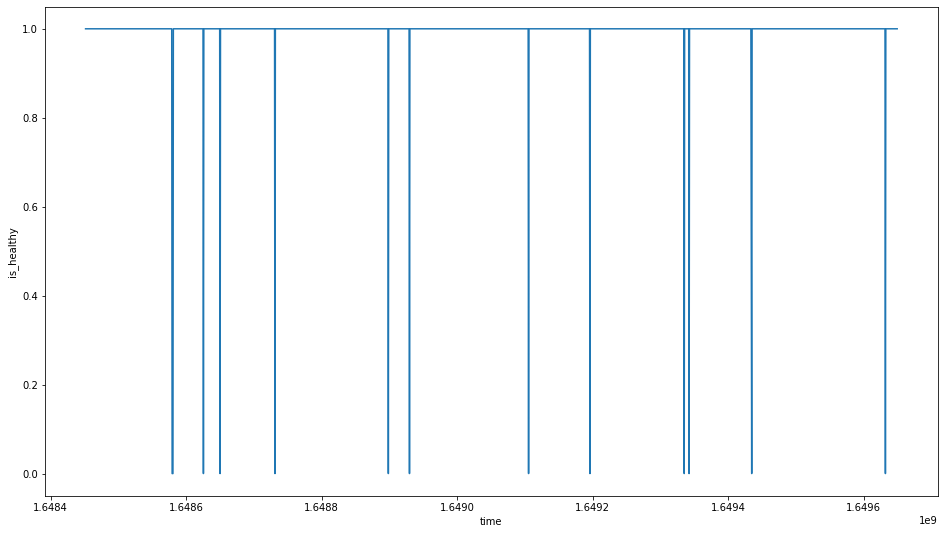

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x = 'time',
            y = 'is_healthy',
            data = df_network)

In [17]:
df_network["is_healthy"].count()

1996

In [18]:
total = 1997
false = 14 
true = total - false

true_percent = true / total 
false_percent = 1 - true_percent

print(true_percent)
print(false_percent)


0.9929894842263395
0.0070105157736605195


In [19]:
true 

1983

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(df_network['messages_per_second'])
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_network['messages_per_second'].mean()
df_network['messages_per_second'].std()

messages_per_second = []
for index, row in df_network.iterrows():
    messages_per_second.append(df_network['messages_per_second'][index])
    
messages_per_second

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = messages_per_second
  
# Calculating mean and standard deviation
mean = df_network['messages_per_second'].mean()
sd = df_network['messages_per_second'].std()

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x = 'time',
            y = 'messages_per_second',
            data = df_network)

In [ ]:
df_network['messages_per_second'].mean()
df_network['messages_per_second'].std()

In [ ]:
df_iota_small_grouped = df_iota_small.groupby("packet_size_bytes").mean()

In [ ]:
df_iota_small_grouped